<a href="https://colab.research.google.com/github/peteray-dev/Vectorization_sleepdt/blob/master/Vectorization%2C_trans_on_face_ident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [118]:
gfmt = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2324/main/datasets/gfmt_sleep.csv')

In [119]:
gfmt.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50,75.0,50,4,11,7
2,18,f,31,90,95,92.5,89.5,90,86.0,81,89.0,88,10,9,3
3,22,f,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
4,27,f,74,60,65,62.5,68.5,49,61.0,49,65.0,49,13,9,12


In [120]:
#Data leaning, Inspection and Pre processing


In [121]:
gfmt = gfmt.set_index('participant number')

In [122]:
gfmt = gfmt.drop(columns='gender')

In [123]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     102 non-null    object 
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  102 non-null    object 
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         102 non-null    object 
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

In [124]:
gfmt.loc[gfmt['confidence when incorrect hit'].str.contains('\*')].head()

,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
participant number,,,,,,,,,,,,,
22,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20
35,53,100,50,75.0,74.5,*,60.5,65,71.0,65,14,8,7
76,61,100,40,70.0,69.5,*,44.5,73,54.5,73,16,4,12
78,31,100,70,85.0,92.0,*,81.0,60,87.5,60,14,6,11
80,28,100,50,75.0,100.0,*,100.0,100,100.0,100,12,7,12


In [125]:
gfmt.loc[gfmt['confidence when incorrect reject'].str.contains('\*')].head()

,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
participant number,,,,,,,,,,,,,
34,33,80,100,90.0,70.5,76.5,64.5,*,68.0,76.5,14,12,10
41,36,90,100,95.0,76.5,75.5,75.0,*,76.0,75.5,15,7,0
71,40,40,100,70.0,69.0,56,70.0,*,70.0,56,0,11,14
5,18,90,100,95.0,76.5,83,80.0,*,80.0,83,21,7,5
10,25,100,100,100.0,90.0,*,85.0,*,90.0,*,17,10,11


In [126]:
#I will try to coerce them into numeric
#helps to set the invalide as NAN

pd.to_numeric(gfmt['confidence when incorrect hit'], errors='coerce')

participant number
8      90.0
16     55.5
18     90.0
22      NaN
27     49.0
       ... 
97     66.5
98     85.5
99     81.0
102    37.0
103    27.0
Name: confidence when incorrect hit, Length: 102, dtype: float64

In [127]:
not_a_num = pd.to_numeric(gfmt['confidence when incorrect hit'], errors='coerce')
not_a_num.isna()

participant number
8      False
16     False
18     False
22      True
27     False
       ...  
97     False
98     False
99     False
102    False
103    False
Name: confidence when incorrect hit, Length: 102, dtype: bool

In [128]:
cols_with_missing_values = [
    'confidence when incorrect hit',
    'confidence when incorrect reject',
    'confidence when incorrect'
]


In [129]:
gfmt[cols_with_missing_values] = gfmt[cols_with_missing_values].replace('*', np.nan).astype(float)


In [130]:
gfmt.head()

,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence when incorrect hit,confidence when correct reject,confidence when incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
participant number,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
16,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
18,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
22,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
27,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


In [131]:
gfmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 8 to 103
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               102 non-null    int64  
 1   correct hit percentage            102 non-null    int64  
 2   correct reject percentage         102 non-null    int64  
 3   percent correct                   102 non-null    float64
 4   confidence when correct hit       102 non-null    float64
 5   confidence when incorrect hit     84 non-null     float64
 6   confidence when correct reject    102 non-null    float64
 7   confidence when incorrect reject  93 non-null     float64
 8   confidence when correct           102 non-null    float64
 9   confidence when incorrect         99 non-null     float64
 10  sci                               102 non-null    int64  
 11  psqi                              102 non-null    int64  
 12  ess     

In [132]:
gfmt = gfmt.set_axis(['age', 'acc_hit', 'acc_rjct', 'acc',
    'conf_acc_hit', 'conf_incorr_hit', 'conf_acc_rjct', 'conf_incorr_rjct',
    'conf_acc', 'conf_incorr', 'sci', 'psqi', 'ess'], axis=1)


In [133]:
gfmt.head(1)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess
participant number,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2


In [134]:
#Creating groups that are insomniac and Normal Sleeper Group

In [135]:
gfmt['sci']<=16

participant number
8       True
16      True
18      True
22      True
27      True
       ...  
97     False
98     False
99     False
102    False
103    False
Name: sci, Length: 102, dtype: bool

In [136]:
gfmt['sleeper_group'] = gfmt['sci']<=16

In [137]:
gfmt.head(5)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess,sleeper_group
participant number,,,,,,,,,,,,,,
8,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
16,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
18,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
22,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
27,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


In [138]:
gfmt['sleeper_group'] = gfmt['sleeper_group'].map({True: 'insomniac', False: 'normal sleeper'})



In [139]:
gfmt.sample(5)

,age,acc_hit,acc_rjct,acc,conf_acc_hit,conf_incorr_hit,conf_acc_rjct,conf_incorr_rjct,conf_acc,conf_incorr,sci,psqi,ess,sleeper_group
participant number,,,,,,,,,,,,,,
58,16,85,85,85.0,55.0,30.0,50.0,40.0,52.5,35.0,29,2,11,normal sleeper
80,28,100,50,75.0,100.0,NaN,100.0,100.0,100.0,100.0,12,7,12,insomniac
100,44,65,25,45.0,62.0,72.0,87.0,77.0,69.5,73.5,1,15,6,insomniac
56,50,70,85,77.5,92.5,72.5,95.0,65.0,95.0,65.0,29,3,7,normal sleeper
31,44,95,90,92.5,83.0,56.0,79.0,42.5,81.0,54.0,24,4,0,normal sleeper


In [140]:
gfmt['sleeper_group'].value_counts(normalize=True)

normal sleeper    0.754902
insomniac         0.245098
Name: sleeper_group, dtype: float64

*Working on other dataset for data transformation*

In [142]:
dataset_location = 'https://raw.githubusercontent.com/gerberl/6G7V0026-2324/main/datasets/gapminder.tsv'
gm = pd.read_csv(dataset_location, sep='\t')

In [148]:
china = gm.loc[gm['country']=='China'].set_index('year')
china

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,China,Asia,44.00000,556263527,400.448611
1957,China,Asia,50.54896,637408000,575.987001
1962,China,Asia,44.50136,665770000,487.674018
1967,China,Asia,58.38112,754550000,612.705693
1972,China,Asia,63.11888,862030000,676.900092
1977,China,Asia,63.96736,943455000,741.237470
1982,China,Asia,65.52500,1000281000,962.421381
1987,China,Asia,67.27400,1084035000,1378.904018
1992,China,Asia,68.69000,1164970000,1655.784158


In [149]:
india = gm.loc[gm['country']=='India'].set_index('year')
india

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,India,Asia,37.373,372000000,546.565749
1957,India,Asia,40.249,409000000,590.061996
1962,India,Asia,43.605,454000000,658.347151
1967,India,Asia,47.193,506000000,700.770611
1972,India,Asia,50.651,567000000,724.032527
1977,India,Asia,54.208,634000000,813.337323
1982,India,Asia,56.596,708000000,855.723538
1987,India,Asia,58.553,788000000,976.512676
1992,India,Asia,60.223,872000000,1164.406809


In [152]:
life_exp_diff = china['lifeExp']-india['lifeExp']
life_exp_diff

year
1952     6.62700
1957    10.29996
1962     0.89636
1967    11.18812
1972    12.46788
1977     9.75936
1982     8.92900
1987     8.72100
1992     8.46700
1997     8.66100
2002     9.14900
2007     8.26300
Name: lifeExp, dtype: float64

In [160]:
df_exp = pd.concat([
    china['lifeExp'], india['lifeExp'], life_exp_diff
], axis=1)
df_exp

,lifeExp,lifeExp,lifeExp
year,,,
1952,44.00000,37.373,6.62700
1957,50.54896,40.249,10.29996
1962,44.50136,43.605,0.89636
1967,58.38112,47.193,11.18812
1972,63.11888,50.651,12.46788
1977,63.96736,54.208,9.75936
1982,65.52500,56.596,8.92900
1987,67.27400,58.553,8.72100
1992,68.69000,60.223,8.46700


In [162]:
df_exp = df_exp.set_axis(['China_LifeExp', 'India_lifeExp', 'LifeExp_diff'], axis=1)
df_exp

,China_LifeExp,India_lifeExp,LifeExp_diff
year,,,
1952,44.00000,37.373,6.62700
1957,50.54896,40.249,10.29996
1962,44.50136,43.605,0.89636
1967,58.38112,47.193,11.18812
1972,63.11888,50.651,12.46788
1977,63.96736,54.208,9.75936
1982,65.52500,56.596,8.92900
1987,67.27400,58.553,8.72100
1992,68.69000,60.223,8.46700


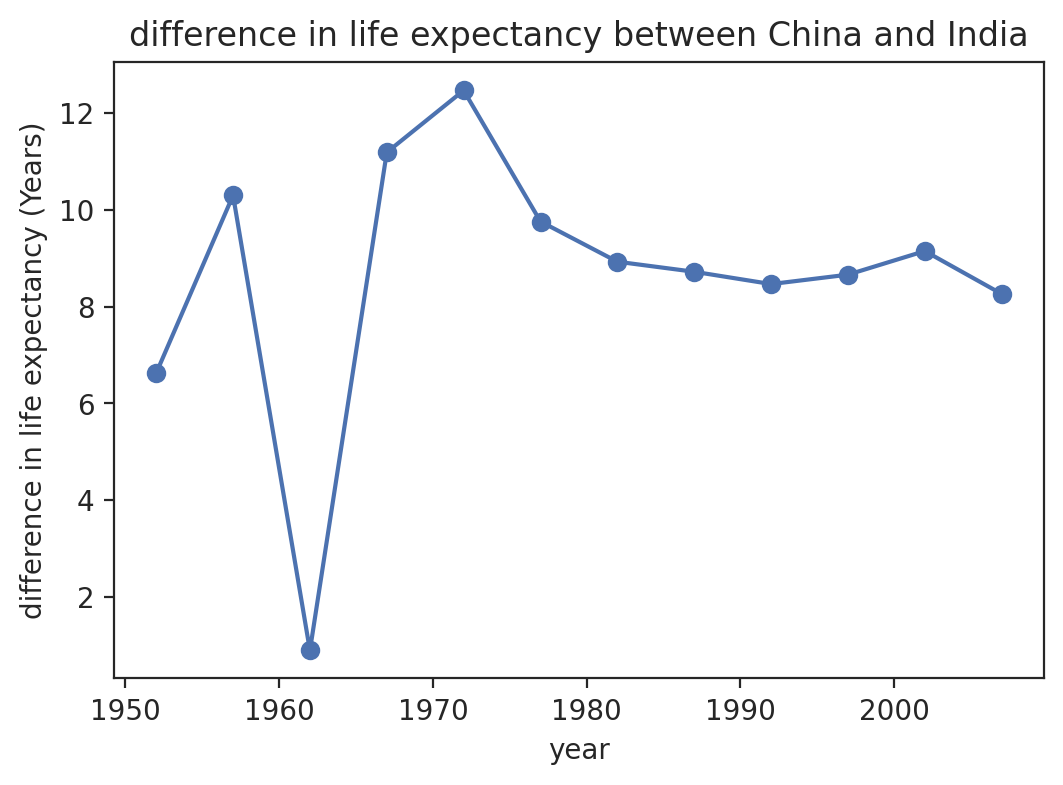

In [168]:
ax = df_exp['LifeExp_diff'].plot(marker='o');
ax.set_title('difference in life expectancy between China and India');
ax.set_ylabel('difference in life expectancy (Years)');

In [172]:
#features derivation

gm_2007 = gm.loc[gm['year'] == 2007].copy(deep=True)

In [174]:
total_pop = gm_2007['pop'].sum()
total_pop

6251013179

In [175]:
#finding the percentage population
gm_2007['pop'] / total_pop

11      0.005102
23      0.000576
35      0.005332
47      0.001987
59      0.006447
          ...   
1655    0.013640
1667    0.000643
1679    0.003553
1691    0.001879
1703    0.001969
Name: pop, Length: 142, dtype: float64

In [181]:
gm_2007['pop_perc'] = (gm_2007['pop'] / total_pop)*100
gm_2007.sort_values('pop_perc').tail()

,country,continent,year,lifeExp,pop,gdpPercap,pop_perc
179,Brazil,Americas,2007,72.390,190010647,9065.800825,3.039678
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,3.576172
1619,United States,Americas,2007,78.242,301139947,42951.653090,4.817458
707,India,Asia,2007,64.698,1110396331,2452.210407,17.763462
299,China,Asia,2007,72.961,1318683096,4959.114854,21.095510


**DISCRETISATION**

Changing a continuous data type to categorical dtype

Using a diabetes dataset, there is a column named 'BMI', I need to convert the column to categorical dtype

* *Underweight*: < 18.5.
* *Normal weight*: between 18.5 and 25.
* *Overweight*: between 25 to 30.
* *Obese*: 30 or greater.


In [182]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0026-2324/main/datasets/diabetes.csv')

In [183]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [184]:
max_BMI = diabetes['BMI'].max()
min_BMI = diabetes['BMI'].min()

max_BMI, min_BMI

(67.1, 0.0)

In [189]:
pd.cut(
    diabetes['BMI'],
    bins=[min_BMI, 18.5, 25, 30, max_BMI+0.01],
    labels= ['low', 'normal', 'overweight', 'obese'],
    right=True, include_lowest=False
)

0           obese
1      overweight
2          normal
3      overweight
4           obese
          ...    
763         obese
764         obese
765    overweight
766         obese
767         obese
Name: BMI, Length: 768, dtype: category
Categories (4, object): ['low' < 'normal' < 'overweight' < 'obese']

In [190]:
diabetes['BMI_cat']= pd.cut(
    diabetes['BMI'],
    bins=[min_BMI, 18.5, 25, 30, max_BMI+0.01],
    labels= ['low', 'normal', 'overweight', 'obese'],
    right=True, include_lowest=False
)